In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("student_habits_performance.csv")
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['student_id'])

# Handle missing values (if any)
df = df.dropna()

In [ ]:
# Separate numerical and categorical features
num_features = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]
cat_features = [
    'gender', 'part_time_job', 'diet_quality', 'parental_education_level',
    'internet_quality', 'extracurricular_participation'
]

# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Standardize numerical data for fair clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

In [ ]:
# Step 3: Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

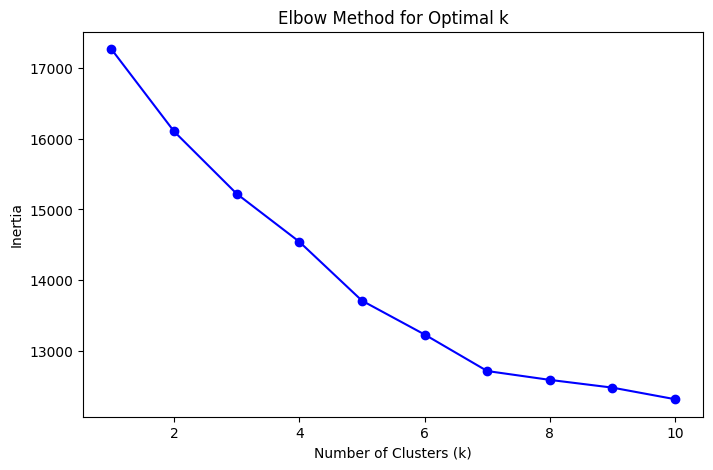

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Step 4: K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
print(df['Cluster'].value_counts())

Cluster
1    391
0    351
2    167
Name: count, dtype: int64


In [ ]:
cluster_summary = df.groupby('Cluster')[num_features].mean()
cluster_summary

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
Cluster,,,,,,,,,
0,20.598291,2.562678,2.622222,2.036467,82.235897,6.299145,2.829060,4.643875,55.873789
1,20.365729,4.397442,2.390281,1.658056,85.899233,6.631202,3.332481,6.455243,82.471100
2,20.473054,3.579641,2.525150,1.800599,82.609581,6.473653,2.862275,4.880240,68.086826


/tmp/ipython-input-1440861620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


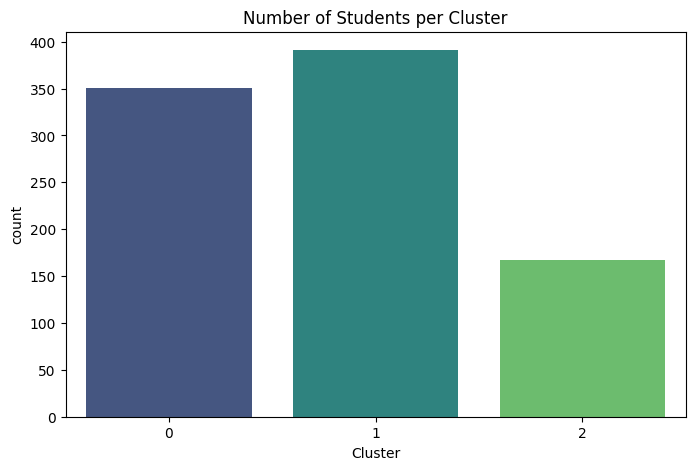

In [ ]:
# Visualization: Cluster Count
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Students per Cluster')
plt.show()

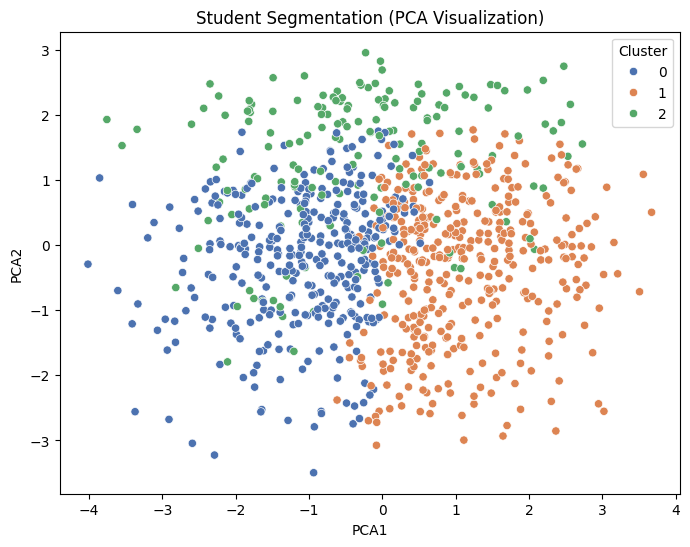

In [ ]:
pca = PCA(2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='deep')
plt.title('Student Segmentation (PCA Visualization)')
plt.show()

In [ ]:
df.to_csv("segmented_students.csv", index=False)
print("\nSegmented data saved as 'segmented_students.csv'")


Segmented data saved as 'segmented_students.csv'


### Segmentation Analysis - How we did

The goal of this analysis was to group students into meaningful categories based on their lifestyle habits, study patterns, and academic performance using K-Means clustering, a popular unsupervised machine learning technique. The process began with cleaning and preparing the data to ensure accuracy and consistency before applying any algorithms.

The dataset initially contained information such as each student’s age, study hours, social media and entertainment habits, attendance percentage, sleep duration, diet quality, and exam scores. The first step was to remove any irrelevant columns, such as a student ID, which do not contribute to the clustering process. Missing data was also eliminated to maintain the quality of the input.

Next, the features in the dataset were divided into two categories: numerical and categorical. Numerical features included continuous values such as study hours or attendance percentage, while categorical features represented non-numeric information such as gender, diet quality, or internet quality. Since machine learning algorithms like K-Means work only with numerical data, the categorical variables were transformed into numerical form through a process called one-hot encoding. This technique converts categories into binary indicators so that the algorithm can interpret and compare them properly.

Once all the data was numerical, it was standardized using a Standard Scaler. This scaling step ensures that each feature contributes equally to the clustering process, as variables with large numeric ranges could otherwise dominate the analysis. Standardization transforms all values so that they share a similar scale with a mean of zero and a standard deviation of one.

After preparing the data, the next step was determining the optimal number of clusters. The Elbow Method was used for this purpose. This method involves running K-Means for different numbers of clusters and plotting a graph of the “inertia,” which represents the total distance between data points and their assigned cluster centers. As the number of clusters increases, inertia decreases, but after a certain point, the improvement becomes minimal. The “elbow point” on the graph indicates the best number of clusters to use. Based on the analysis, the optimal number of clusters was found to be three.

With this value selected, K-Means clustering was applied to the standardized data. The algorithm grouped students into three clusters, each representing students with similar habits and performance levels. A summary table was then generated, showing the average values of numerical features for each cluster, allowing for meaningful interpretation of the groups. For instance, one cluster might represent students who study regularly and maintain high academic performance, another might consist of balanced students with moderate engagement, and a third might represent those with lower study time and performance.

To better visualize these groups, Principal Component Analysis (PCA) was used to reduce the multidimensional data into two dimensions for plotting. The resulting scatter plot displayed the clusters clearly, helping to observe how distinct or overlapping the student groups were. Additionally, a count plot showed how many students belonged to each cluster, giving a sense of the relative size of each group.

Overall, this clustering analysis provided valuable insights into student behavior and performance patterns. It helped reveal relationships between academic success and lifestyle habits such as sleep, exercise, and time spent on social media. Such segmentation can be extremely useful for educators and institutions in tailoring academic support, promoting better study habits, and improving student well-being based on data-driven understanding.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df already has 'Cluster' column from K-Means

cluster_summary = df.groupby('Cluster')[num_features].mean()
print("=== Numeric Feature Summary by Cluster ===")
print(cluster_summary)






=== Numeric Feature Summary by Cluster ===
               age  study_hours_per_day  social_media_hours  netflix_hours  \
Cluster                                                                      
0        20.598291             2.562678            2.622222       2.036467   
1        20.365729             4.397442            2.390281       1.658056   
2        20.473054             3.579641            2.525150       1.800599   

         attendance_percentage  sleep_hours  exercise_frequency  \
Cluster                                                           
0                    82.235897     6.299145            2.829060   
1                    85.899233     6.631202            3.332481   
2                    82.609581     6.473653            2.862275   

         mental_health_rating  exam_score  
Cluster                                    
0                    4.643875   55.873789  
1                    6.455243   82.471100  
2                    4.880240   68.086826  


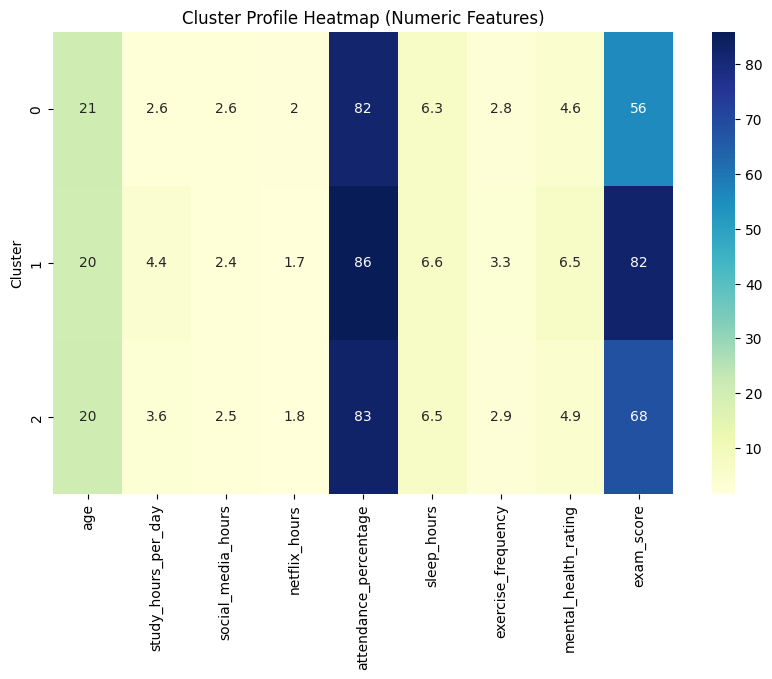

In [ ]:
# Heatmap for numeric cluster profile
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu')
plt.title('Cluster Profile Heatmap (Numeric Features)')
plt.show()


In [ ]:
# -------------------------------
# 2. Categorical Feature Summary
# -------------------------------
for cat in cat_features:
    print(f"=== {cat} Distribution by Cluster ===")
    display(df.groupby('Cluster')[cat].value_counts(normalize=True).unstack())
    print("\n")



=== gender Distribution by Cluster ===


gender,Female,Male,Other
Cluster,,,
0,0.484330,0.464387,0.051282
1,0.470588,0.501279,0.028133
2,0.473054,0.485030,0.041916




=== part_time_job Distribution by Cluster ===


part_time_job,No,Yes
Cluster,,
0,0.743590,0.256410
1,0.818414,0.181586
2,0.790419,0.209581




=== diet_quality Distribution by Cluster ===


diet_quality,Fair,Good,Poor
Cluster,,,
0,0.430199,0.393162,0.176638
1,0.442455,0.378517,0.179028
2,0.431138,0.365269,0.203593




=== parental_education_level Distribution by Cluster ===


parental_education_level,Bachelor,High School,Master
Cluster,,,
0,0.415954,0.584046,NaN
1,0.521739,0.478261,NaN
2,NaN,NaN,1.0




=== internet_quality Distribution by Cluster ===


internet_quality,Average,Good,Poor
Cluster,,,
0,0.376068,0.524217,0.099715
1,0.409207,0.365729,0.225064
2,0.359281,0.497006,0.143713




=== extracurricular_participation Distribution by Cluster ===


extracurricular_participation,No,Yes
Cluster,,
0,0.660969,0.339031
1,0.695652,0.304348
2,0.694611,0.305389


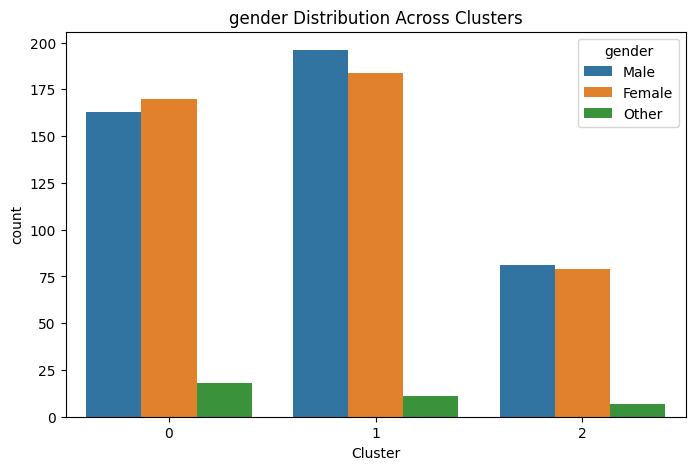

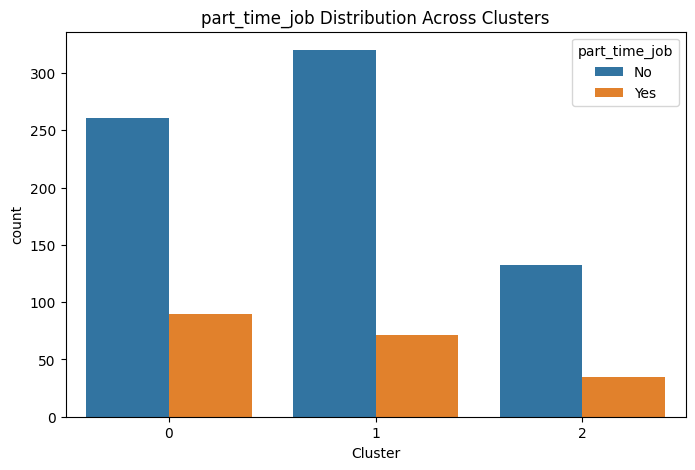

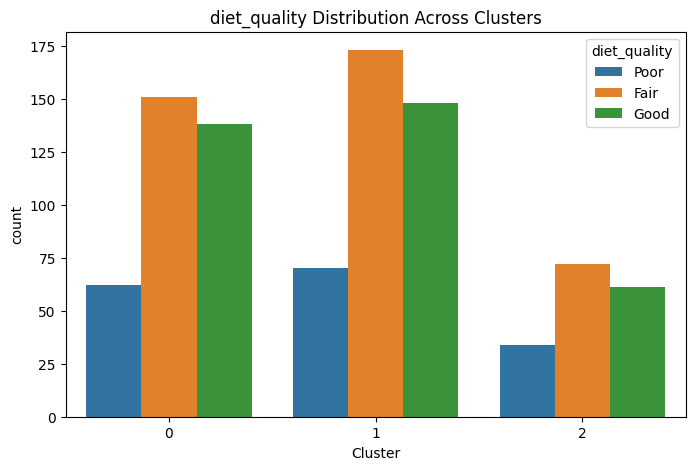

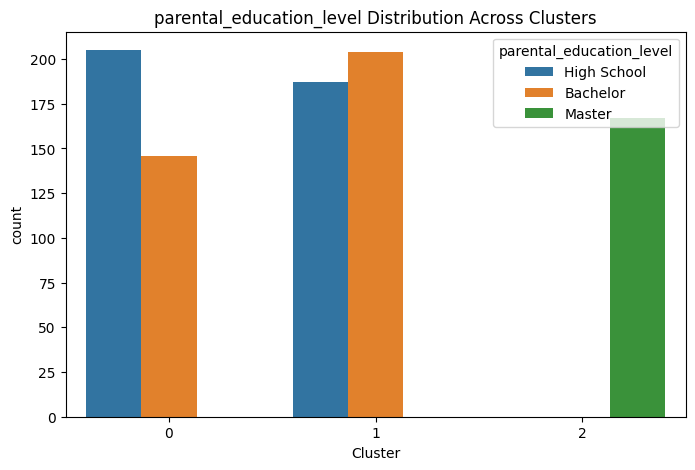

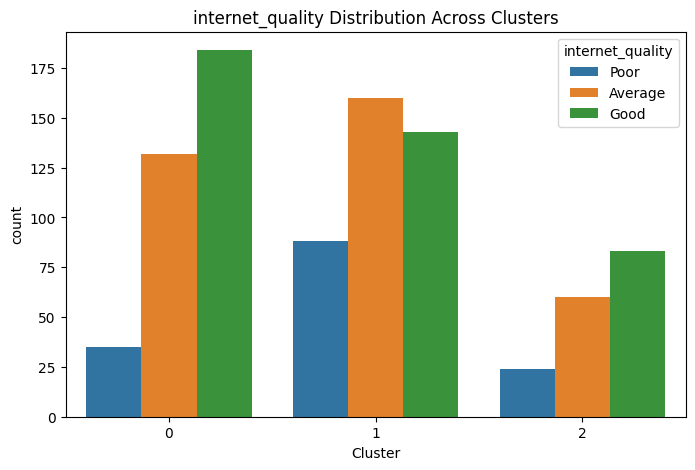

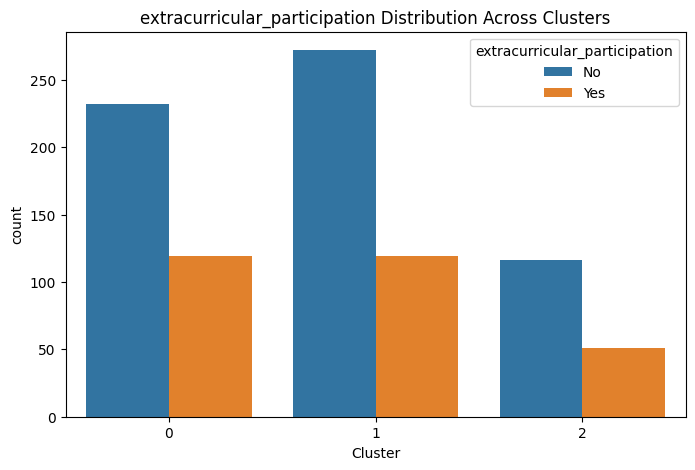

In [ ]:
# -------------------------------
# 3. Visualize Categorical Features
# -------------------------------
for cat in cat_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x='Cluster', hue=cat, data=df)
    plt.title(f'{cat} Distribution Across Clusters')
    plt.show()

/tmp/ipython-input-262988735.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y='exam_score', data=df, palette='Set2')


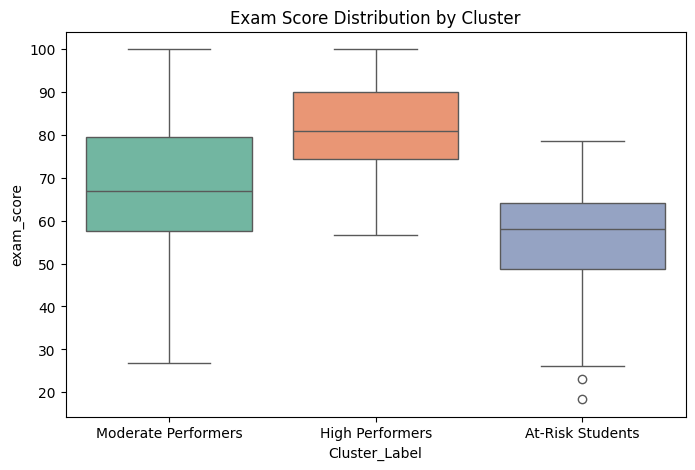

--- Cluster 2 (Moderate Performers) ---
Average Exam Score: 68.09
Average Study Hours per Day: 3.58
Average Social Media Hours: 2.53
Students with Part-Time Jobs: 21.0%
Extracurricular Participation: 30.5%


--- Cluster 1 (High Performers) ---
Average Exam Score: 82.47
Average Study Hours per Day: 4.40
Average Social Media Hours: 2.39
Students with Part-Time Jobs: 18.2%
Extracurricular Participation: 30.4%


--- Cluster 0 (At-Risk Students) ---
Average Exam Score: 55.87
Average Study Hours per Day: 2.56
Average Social Media Hours: 2.62
Students with Part-Time Jobs: 25.6%
Extracurricular Participation: 33.9%




In [ ]:
# -------------------------------
# 4. Label Clusters (Optional)
# -------------------------------
# Based on above cluster analysis we can to know that cluster 0 has low performance
cluster_labels = {
    0: 'At-Risk Students',
    1: 'High Performers',
    2: 'Moderate Performers'
}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# -------------------------------
# 5. Compare Exam Scores Across Clusters
# -------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster_Label', y='exam_score', data=df, palette='Set2')
plt.title('Exam Score Distribution by Cluster')
plt.show()

# -------------------------------
# 6. Business Insights (Print Summary)
# -------------------------------
for cluster in df['Cluster'].unique():
    print(f"--- Cluster {cluster} ({cluster_labels[cluster]}) ---")
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Average Exam Score: {cluster_data['exam_score'].mean():.2f}")
    print(f"Average Study Hours per Day: {cluster_data['study_hours_per_day'].mean():.2f}")
    print(f"Average Social Media Hours: {cluster_data['social_media_hours'].mean():.2f}")
    print(f"Students with Part-Time Jobs: {(cluster_data['part_time_job']=='Yes').mean()*100:.1f}%")
    print(f"Extracurricular Participation: {(cluster_data['extracurricular_participation']=='Yes').mean()*100:.1f}%")
    print("\n")


In [ ]:
# Filter Cluster 0
cluster_0 = df[df['Cluster'] == 0]

cluster_0_summary = cluster_0[num_features].mean()
print("=== Cluster 0 Numeric Feature Averages ===")
print(cluster_0_summary)




# 3. Optional: Quick Insights Print
print("\n--- Quick Insights for Cluster 0 ---")
print(f"Average Age: {cluster_0['age'].mean():.2f} years")
print(f"Average Study Hours per Day: {cluster_0['study_hours_per_day'].mean():.2f} hrs")
print(f"Average Social Media Hours: {cluster_0['social_media_hours'].mean():.2f} hrs")
print(f"Average Netflix Hours: {cluster_0['netflix_hours'].mean():.2f} hrs")
print(f"Average Exam Score: {cluster_0['exam_score'].mean():.2f}")
print(f"Students with Part-Time Jobs: {(cluster_0['part_time_job']=='Yes').mean()*100:.1f}%")
print(f"Students Participating in Extracurriculars: {(cluster_0['extracurricular_participation']=='Yes').mean()*100:.1f}%")


=== Cluster 0 Numeric Feature Averages ===
age                      20.598291
study_hours_per_day       2.562678
social_media_hours        2.622222
netflix_hours             2.036467
attendance_percentage    82.235897
sleep_hours               6.299145
exercise_frequency        2.829060
mental_health_rating      4.643875
exam_score               55.873789
dtype: float64

--- Quick Insights for Cluster 0 ---
Average Age: 20.60 years
Average Study Hours per Day: 2.56 hrs
Average Social Media Hours: 2.62 hrs
Average Netflix Hours: 2.04 hrs
Average Exam Score: 55.87
Students with Part-Time Jobs: 25.6%
Students Participating in Extracurriculars: 33.9%


In [ ]:
# Business Model
# Cluster 0 averages (from your earlier summary)
cluster_0_avg = {
    'study_hours_per_day': 2.56,
    'social_media_hours': 2.62,
    'netflix_hours': 2.04,
    'exam_score': 55.87
}

# Function to recommend actions for a student
def recommend_student(student_row, cluster_avg=cluster_0_avg):
    recommendations = []

    # Social Media
    if student_row['social_media_hours'] > cluster_avg['social_media_hours']:
        recommendations.append("Reduce social media usage to below {:.2f} hrs/day.".format(cluster_avg['social_media_hours']))

    # Netflix / Entertainment
    if student_row['netflix_hours'] > cluster_avg['netflix_hours']:
        recommendations.append("Limit Netflix/entertainment hours to improve study time.")

    # Study Hours
    if student_row['study_hours_per_day'] < cluster_avg['study_hours_per_day']:
        recommendations.append("Increase study hours to at least {:.2f} hrs/day.".format(cluster_avg['study_hours_per_day']))

    # Exam Score
    if student_row['exam_score'] < cluster_avg['exam_score']:
        recommendations.append("Focus on weak subjects; consider tutoring or study groups.")

    # Optional: Attendance
    if student_row['attendance_percentage'] < 85:
        recommendations.append("Improve attendance to above 85% to enhance learning.")

    # Optional: Sleep / Mental Health
    if student_row['sleep_hours'] < 7:
        recommendations.append("Maintain at least 7 hrs of sleep for better performance.")

    if student_row['mental_health_rating'] < 5:
        recommendations.append("Consider counseling or mental wellness programs.")

    return recommendations

# Example: recommend for a single student
student_example = df.iloc[5]  # replace with any student row
print("Recommendations for Student ID:", student_example.name)
for r in recommend_student(student_example):
    print("-", r)



Recommendations for Student ID: 5
- Improve attendance to above 85% to enhance learning.
- Consider counseling or mental wellness programs.


## Business Model

Targeted Advertising for Students Using Social Media: A Data-Driven Approach

In today’s digital world, social media has become a core part of students’ daily lives. Platforms like Instagram, TikTok, and Snapchat record the time users spend on their apps, offering a unique opportunity for businesses to reach highly engaged audiences. But how can brands ensure their advertisements reach the students who are most likely to see and interact with them?

The answer lies in data-driven targeting.

Identifying the Audience

Our business approach focuses on students whose social media usage exceeds the average screen time. By analyzing aggregated data from social media platforms, we can identify clusters of students based on their usage patterns, study habits, and engagement levels.

For example, through analysis of student behavior, we found that the average daily social media usage among a target group of students was 2.6 hours per day. Students who exceed this average represent a highly engaged segment — they are more likely to notice and interact with advertisements.

Personalized Advertising Strategy

Once we identify this audience segment, we design targeted ads that are shown exclusively to students with higher-than-average app usage. This ensures that marketing efforts are efficient and effective, minimizing wasted impressions and maximizing engagement.

The strategy includes:

Screen Time-Based Targeting

Ads are delivered to students whose daily screen time is above the average benchmark.

Content Relevance

Using insights from clusters, ads are tailored to match student interests — e.g., educational tools, online courses, productivity apps, or lifestyle products.

Dynamic Timing

Ads are shown when students are most active on the platform, increasing the likelihood of interaction.

Benefits for Businesses and Students

Higher ROI for Advertisers: By focusing on highly active users, businesses reduce ad spend waste and increase conversion rates.

Relevant Content for Students: Students see ads that align with their interests and needs, improving engagement and satisfaction.

Data-Driven Insights: Continuous monitoring of screen time and engagement provides valuable feedback to refine campaigns further.

The Future of Social Media Advertising

With the rise of data analytics and personalized targeting, businesses can move beyond traditional demographic filters. By leveraging behavioral data, like screen time, companies can make smarter advertising decisions while offering students relevant and meaningful content.

At our company, we combine behavioral insights, cluster analysis, and real-time data to ensure that every advertisement reaches the right student at the right time. This is the future of social media marketing: targeted, intelligent, and effective.

# Financial Analysis

1. Define Variables

Let
𝑥
x = number of student subscriptions per month

Let
𝑠
s = subscription price per student (₹)

Let
𝑐
c = cost paid to social media platforms for targeting ads (₹)

Revenue (R):

𝑅
=
𝑠
⋅
𝑥
R=s⋅x

Cost (C):

𝐶
=
𝑐
C=c

(fixed per month, depending on how many ads you run to attract students)

Profit (P):

𝑃
=
𝑅
−
𝐶
=
𝑠
⋅
𝑥
−
𝑐
P=R−C=s⋅x−c
2. Example Calculation

Let’s assume:

Subscription price per student
𝑠
=
200
s=200 ₹/month

Cost paid to social media apps
𝑐
=
50
,
000
c=50,000 ₹/month

Number of subscriptions in June
𝑥
=
400
x=400

Revenue:

𝑅
=
200
×
400
=
80
,
000
R=200×400=80,000

Profit:

𝑃
=
80
,
000
−
50
,
000
=
30
,
000
P=80,000−50,000=30,000
3. Financial Equation
𝑃
(
𝑥
)
=
𝑠
⋅
𝑥
−
𝑐
P(x)=s⋅x−c
	​


Here,
𝑥
x = number of student subscriptions.

𝑠
s = subscription fee per student.

𝑐
c = monthly advertising cost on social media apps.

Example with numbers:

𝑃
(
𝑥
)
=
200
𝑥
−
50
,
000
P(x)=200x−50,000

Break-even point: Solve
𝑃
(
𝑥
)
=
0
⇒
200
𝑥
−
50
,
000
=
0
⇒
𝑥
=
250
P(x)=0⇒200x−50,000=0⇒x=250 subscriptions.

Every subscription beyond 250 generates profit.

4. Insights

Scalability: Profit increases linearly with more subscriptions.

Marketing Spend: Cost
𝑐
c is mainly for advertising on social media. Optimize campaigns to reduce cost per acquired subscriber.

Subscription Pricing: You can test different subscription prices
𝑠
s to see the effect on profit.